# Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

In [2]:
# Loaded variable 'df' from URI: h:\My Drive\Pathogenic_Landscape\data\absolute\clinical_research_filtered_combined\final_filtered_combined.tsv
ogdf = pd.read_csv(r'H:\My Drive\Pathogenic_Landscape\data\indigene\Indigene_filtered.tsv', sep='\t', engine='pyarrow')

Total number of variants = 50068

In [3]:
print(ogdf.shape)

(50068, 11)


In [4]:
ogdf.head(n=500)

,SID,Chr_SERA,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,AAChange.ensGene,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar
0,063T-OTP-CE-S32-Merged,chr1 | 11227554 | 11227554 | T | C,MTOR,exonic,Nonsynonymous SNV,ENSG00000198793:ENST00000361445:exon29:c.4274A...,Armadillo-like helical|Armadillo-type fold|PIK...,.,.,.,clinvar: UNK
1,063T-OTP-CE-S32-Merged,chr1 | 16199526 | 16199526 | G | A,SPEN,exonic,Nonsynonymous SNV,ENSG00000065526:ENST00000375759:exon2:c.299G>A...,.,rs146693537,.,.,clinvar: UNK
2,063T-OTP-CE-S32-Merged,chr1 | 27092786 | 27092786 | G | A,ARID1A,exonic,Nonsynonymous SNV,ENSG00000117713:ENST00000374152:exon8:c.1658G>...,.,.,.,.,clinvar: UNK
3,063T-OTP-CE-S32-Merged,chr1 | 98015133 | 98015133 | T | C,DPYD,exonic,Nonsynonymous SNV,ENSG00000188641:ENST00000370192:exon12:c.1507A...,FAD/NAD(P)-binding domain,rs751104498,.,.,clinvar: UNK
4,063T-OTP-CE-S32-Merged,chr1 | 120510113 | 120510113 | G | T,NOTCH2,exonic,Nonsynonymous SNV,ENSG00000134250:ENST00000256646:exon8:c.1396C>...,EGF-like calcium-binding domain|EGF-like calci...,rs141935585,not_specified,MedGen:CN169374,clinvar: not_provided
...,...,...,...,...,...,...,...,...,...,...,...
495,VAXB-F1F2-CE-S28,chr3 | 12641293 | 12641297 | TCTGTC | T,RAF1,exonic,Frameshift Deletion,ENSG00000132155:ENST00000534997:exon6:c.356_36...,.,.,.,.,clinvar: UNK
496,VAXB-F1F2-CE-S28,chr3 | 37092024 | 37092024 | A | T,MLH1,exonic,Nonsynonymous SNV,ENSG00000076242:ENST00000413740:exon4:c.338A>T...,"DNA mismatch repair protein Mlh1, C-terminal",.,Hereditary_nonpolyposis_colon_cancer|Hereditar...,"MedGen:C0009405,Orphanet:ORPHA443090|MedGen:C0...",clinvar: Uncertain_significance
497,VAXB-F1F2-CE-S28,chr3 | 41267263 | 41267263 | G | A,CTNNB1,exonic,Nonsynonymous SNV,ENSG00000168036:ENST00000349496:exon6:c.847G>A...,Armadillo-like helical|Armadillo-type fold,.,.,.,clinvar: UNK
498,VAXB-F1F2-CE-S28,chr3 | 47103745 | 47103746 | C | CACA,SETD2,exonic,Nonframeshift Insertion,ENSG00000181555:ENST00000409792:exon14:c.6200_...,.,.,.,.,clinvar: UNK


In [5]:
#-- Adjust
# Rename SID to Sample_Name
ogdf = ogdf.rename(columns={'SID': 'Sample_Name'})

# Split the 'Chr_SERA' column into multiple columns
split_cols = ogdf['Chr_SERA'].str.split(r'\s*\|\s*', expand=True)
split_cols.columns = ['CHROM_x', 'POS_x', 'End_x', 'REF_x', 'ALT_x']

# Find the position of 'Chr_SERA' in the dataframe
col_idx = ogdf.columns.get_loc('Chr_SERA') + 1  # Get index and shift by 1 for placement after

# Insert new columns right after 'Chr_SERA'
for i, col in enumerate(split_cols.columns):
    ogdf.insert(col_idx + i, col, split_cols[col])

In [6]:
# Number of unique samples
unique_sample_count = ogdf['Sample_Name'].nunique()

print(unique_sample_count)

2503


In [7]:
# Get the list of unique sample names
# unique_samples = ogdf['Sample_Name'].unique()

# Save to a text file, each sample on a new line
# with open("unique_samples.txt", "w") as f:
#     for sample in unique_samples:
#         f.write(str(sample) + "\n")

Clinvar Variant Annotations and their count

In [7]:
ogdf['clinvar: Clinvar '].value_counts()

clinvar: Clinvar 
clinvar: UNK                                                              38515
clinvar: Conflicting_interpretations_of_pathogenicity                      4929
clinvar: Uncertain_significance                                            2813
clinvar: Pathogenic                                                        1819
clinvar: Likely_pathogenic                                                  592
clinvar: not_provided                                                       575
clinvar: Pathogenic/Likely_pathogenic                                       479
clinvar: drug_response                                                      187
clinvar: Conflicting_interpretations_of_pathogenicity,_risk_factor           45
clinvar: Likely_pathogenic,_risk_factor                                      24
clinvar: Pathogenic/Likely_pathogenic,_other                                 20
clinvar: Conflicting_interpretations_of_pathogenicity,_other                 15
clinvar: other        

---


In [8]:
#--- Hotspot Variant Markup ---#
# Load the text file with hotspot variants
hotspot_source_path = r"H:\My Drive\Pathogenic_Landscape\assets\hotspot_v14.txt"
hotspot_source_df = pd.read_csv(hotspot_source_path, sep="\t")

# Extract relevant columns from hotspot data
hotspot_source_variants = set(zip(hotspot_source_df["#CHROM"], hotspot_source_df["POS"], hotspot_source_df["REF"], hotspot_source_df["ALT"]))

# Label rows based on hotspot variants
ogdf["Hotspot"] = ogdf.apply(lambda row: 1 if (row['CHROM_x'], row['POS_x'], row['REF_x'], row['ALT_x']) in hotspot_source_variants else 0, axis=1)

In [9]:
#--- Oncogene and TSG Gene Markup ---#
# Load the text file with oncogene and tumor suppressor gene info obtained from OncoKB
oncog_tsg_source_path = r"H:\My Drive\Pathogenic_Landscape\assets\Oncogene_TSG.txt"
oncog_tsg_source_df = pd.read_csv(oncog_tsg_source_path, sep="\t")

# Convert to a dictionary for quick lookup
oncog_tsg_dict = dict(zip(oncog_tsg_source_df["Hugo Symbol"], oncog_tsg_source_df["OncoG_TSG"]))

# Identify the gene column
gene_column = "Ref.Gene"  # Assuming this column contains gene names

if gene_column in ogdf.columns:
    ogdf["OncoG_TSG"] = ogdf[gene_column].map(oncog_tsg_dict).fillna("")
else:
    raise ValueError(f"The required column '{gene_column}' is missing in the dataset.")

In [10]:
#--- Load the kinase gene list ---#
kinase_gene_file = r"H:\My Drive\Pathogenic_Landscape\assets\Kinase_Genes.txt"
with open(kinase_gene_file, "r") as f:
    kinase_genes = set(gene.strip() for gene in f.readlines())

# Add the "Kinase" column
ogdf["Kinase"] = ogdf["Ref.Gene"].apply(lambda gene: 1 if gene in kinase_genes else 0)

In [11]:
#--- Removing Non-Cancer Samples ---#
# List of non-cancer samples to remove
samples_to_remove = [
    'IN-423-TLRA-F-Merged-IE', '005N_IE', '006N_IE', '009N_IE', '010N_IE', '011N_IE']
# Drop rows where 'Sample_Name' column contains any of the values in the list
df = ogdf[~ogdf['Sample_Name'].isin(samples_to_remove)]
print(df.shape)
df['Sample_Name'].nunique()

(50068, 19)


2503

In [12]:
#--- Cancer info Markup ---#
# Load the text file with curated cancer info
cancer_source_path = r"H:\My Drive\Pathogenic_Landscape\assets\Indigene Cancer\Indigene_Cancer_info.txt"
cancer_source_df = pd.read_csv(cancer_source_path, sep="\t")

# Merge the cancer information based on the Sample_Name column
df = df.merge(cancer_source_df, on="Sample_Name", how="left")

In [13]:
#--- Removing N/A Cancer Samples ---#
df = df.dropna(subset=['Cancer'])

In [14]:
# Cancer Counts
df.groupby('Cancer')['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')

,Cancer,Unique_Sample_Count
0,Brain,34
1,Breast,196
2,Cervix,36
3,Esophagus,63
4,Gallbladder,74
5,Head and Neck,26
6,Kidney,26
7,Large Intestine,178
8,Liver and intrahepatic bile ducts,120
9,Lung,546


In [15]:
# Mapping Dictionary
cancer_mapping = {
    "Brain": "BrC",
    "Breast": "BC",
    "Cervix": "CC",
    "Esophagus": "EC",
    "Gallbladder": "GBC",
    "Head and Neck": "HNC",
    "Kidney": "KC",
    "Large Intestine": "LIC",
    "Liver and intrahepatic bile ducts": "LBC",
    "Lung": "LC",
    "Oral": "OC",
    "Others": "Others",
    "Ovary": "OvC",
    "Pancreas": "PC",
    "Prostate": "PrC",
    "Rectum": "RC",
    "Sarcoma": "SC",
    "Stomach": "StC",
    "Thyroid": "TC",
    "Unknown primary": "UPC",
    "Urinary Bladder": "UBC",
    "Uterus": "UtC",
    "Retroperitoneum and Peritoneum": "RePC",
    "Skin": "SkC",
    "Small Intestine": "SIC"
}

# Apply mapping
df["Cancer_Short"] = df["Cancer"].map(cancer_mapping)

In [16]:
# Cancer Counts
df.groupby('Cancer_Short')['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')

,Cancer_Short,Unique_Sample_Count
0,BC,196
1,BrC,34
2,CC,36
3,EC,63
4,GBC,74
5,HNC,26
6,KC,26
7,LBC,120
8,LC,546
9,LIC,178


In [17]:
total_unique_samples_in_df = df['Sample_Name'].nunique()
print(total_unique_samples_in_df)

2365


In [18]:
print(df.shape)

(46788, 21)


In [19]:
df.head()

,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
0,063T-OTP-CE-S32-Merged,chr1 | 11227554 | 11227554 | T | C,chr1,11227554,11227554,T,C,MTOR,exonic,Nonsynonymous SNV,...,Armadillo-like helical|Armadillo-type fold|PIK...,.,.,.,clinvar: UNK,0,Oncogene,1,Unknown primary,UPC
1,063T-OTP-CE-S32-Merged,chr1 | 16199526 | 16199526 | G | A,chr1,16199526,16199526,G,A,SPEN,exonic,Nonsynonymous SNV,...,.,rs146693537,.,.,clinvar: UNK,0,TSG,0,Unknown primary,UPC
2,063T-OTP-CE-S32-Merged,chr1 | 27092786 | 27092786 | G | A,chr1,27092786,27092786,G,A,ARID1A,exonic,Nonsynonymous SNV,...,.,.,.,.,clinvar: UNK,0,TSG,0,Unknown primary,UPC
3,063T-OTP-CE-S32-Merged,chr1 | 98015133 | 98015133 | T | C,chr1,98015133,98015133,T,C,DPYD,exonic,Nonsynonymous SNV,...,FAD/NAD(P)-binding domain,rs751104498,.,.,clinvar: UNK,0,,0,Unknown primary,UPC
4,063T-OTP-CE-S32-Merged,chr1 | 120510113 | 120510113 | G | T,chr1,120510113,120510113,G,T,NOTCH2,exonic,Nonsynonymous SNV,...,EGF-like calcium-binding domain|EGF-like calci...,rs141935585,not_specified,MedGen:CN169374,clinvar: not_provided,0,Both,0,Unknown primary,UPC


---

## Pathogenic Variants Subset Creation

In [21]:
# Define clinvar filters
clinvar_no_conflict = ~df['clinvar: Clinvar '].str.contains("conflict", regex=False, na=False, case=False)
clinvar_patho = df['clinvar: Clinvar '].str.contains("patho", regex=False, na=False, case=False)

# Define Func.ensGene filter
desired_func_values = ['exonic', 'splicing', 'exonic;splicing']
func_ensgene_filter = df['Func.ensGene'].isin(desired_func_values)

# Combine all conditions
patho_only_df = df[clinvar_no_conflict & clinvar_patho & func_ensgene_filter]

In [22]:
print(patho_only_df['Sample_Name'].nunique())
print(patho_only_df.shape)

1497
(2795, 21)


---

## Oncogene

In [23]:
#--- Pathogenic Oncogene Viz ---#
# Subset for oncogenes
oncogene_df = patho_only_df[patho_only_df["OncoG_TSG"].isin(['Oncogene', 'Both'])]
oncogene_df.head()

,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
40,063T-OTP-CE-S32-Merged,chr12 | 25398284 | 25398284 | C | T,chr12,25398284,25398284,C,T,KRAS,exonic,Nonsynonymous SNV,...,P-loop containing nucleoside triphosphate hydr...,rs121913529,Vascular_Tumors_Including_Pyogenic_Granuloma|N...,".|Gene:6765,Human_Phenotype_Ontology:HP:010061...",clinvar: Pathogenic,0,Oncogene,0,Unknown primary,UPC
61,063T-OTP-CE-S32-Merged,chrX | 100624988 | 100624988 | GT | G,chrX,100624988,100624988,GT,G,BTK,exonic,Frameshift Deletion,...,.,rs864321664,X-linked_agammaglobulinemia,"MedGen:C0221026,OMIM:300755,Orphanet:ORPHA47,S...",clinvar: Pathogenic,0,Oncogene,1,Unknown primary,UPC
82,IN-423-VFTM-F-ce-S35-L003,chr12 | 25398285 | 25398285 | C | A,chr12,25398285,25398285,C,A,KRAS,exonic,Nonsynonymous SNV,...,P-loop containing nucleoside triphosphate hydr...,rs121913530,Endometrial_carcinoma|Lung_adenocarcinoma|Non-...,"Human_Phenotype_Ontology:HP:0012114,MedGen:C04...",clinvar: Pathogenic/Likely_pathogenic,0,Oncogene,0,Lung,LC
137,IN-423-VFUH-F-ce-S19-L003,chr3 | 41266101 | 41266101 | C | T,chr3,41266101,41266101,C,T,CTNNB1,exonic,Nonsynonymous SNV,...,.,rs121913400,ADRENAL_CORTICAL_NEOPLASM|Hepatocellular_carci...,".|Human_Phenotype_Ontology:HP:0001402,MedGen:C...","clinvar: Pathogenic/Likely_pathogenic,_other",0,Oncogene,0,Large Intestine,LIC
140,IN-423-VFUH-F-ce-S19-L003,chr12 | 25398284 | 25398284 | C | T,chr12,25398284,25398284,C,T,KRAS,exonic,Nonsynonymous SNV,...,P-loop containing nucleoside triphosphate hydr...,rs121913529,Vascular_Tumors_Including_Pyogenic_Granuloma|N...,".|Gene:6765,Human_Phenotype_Ontology:HP:010061...",clinvar: Pathogenic,0,Oncogene,0,Large Intestine,LIC


In [24]:
print(oncogene_df.shape)
oncogene_df['Sample_Name'].nunique()

(962, 21)


787

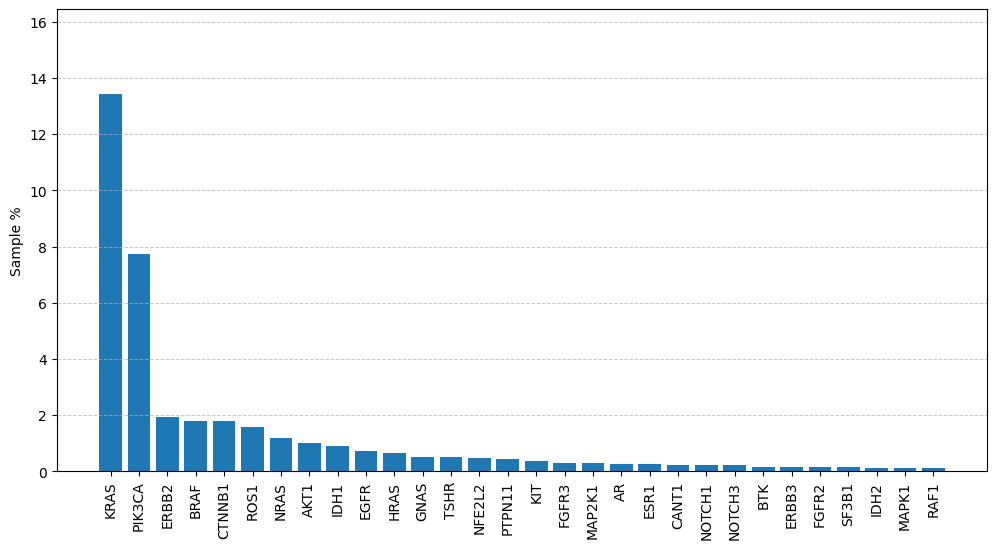

      Gene  Unique Sample Count  Percentage (%)
0     KRAS                  318       13.446089
1   PIK3CA                  183        7.737844
2    ERBB2                   46        1.945032
3     BRAF                   42        1.775899
4   CTNNB1                   42        1.775899
5     ROS1                   37        1.564482
6     NRAS                   28        1.183932
7     AKT1                   24        1.014799
8     IDH1                   21        0.887949
9     EGFR                   17        0.718816
10    HRAS                   15        0.634249
11    GNAS                   12        0.507400
12    TSHR                   12        0.507400
13  NFE2L2                   11        0.465116
14  PTPN11                   10        0.422833
15     KIT                    9        0.380550
16   FGFR3                    7        0.295983
17  MAP2K1                    7        0.295983
18      AR                    6        0.253700
19    ESR1                    6        0

In [60]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = oncogene_df.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the oncogene_df cohort
# total_unique_samples = oncogene_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(30)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 Oncogenes by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values) + 3)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_oncogene_df = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_oncogene_df)

# --- 

In [26]:
#--- Pathogenic Oncogene Viz ---#
# Subset for oncogenes
oncogene_df1 = df[df["OncoG_TSG"].isin(['Oncogene', 'Both'])]
oncogene_df1.head()

,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
0,063T-OTP-CE-S32-Merged,chr1 | 11227554 | 11227554 | T | C,chr1,11227554,11227554,T,C,MTOR,exonic,Nonsynonymous SNV,...,Armadillo-like helical|Armadillo-type fold|PIK...,.,.,.,clinvar: UNK,0,Oncogene,1,Unknown primary,UPC
4,063T-OTP-CE-S32-Merged,chr1 | 120510113 | 120510113 | G | T,chr1,120510113,120510113,G,T,NOTCH2,exonic,Nonsynonymous SNV,...,EGF-like calcium-binding domain|EGF-like calci...,rs141935585,not_specified,MedGen:CN169374,clinvar: not_provided,0,Both,0,Unknown primary,UPC
5,063T-OTP-CE-S32-Merged,chr1 | 156846258 | 156846258 | C | G,chr1,156846258,156846258,C,G,NTRK1,exonic,Nonsynonymous SNV,...,"Protein kinase domain|Protein kinase, ATP bind...",.,.,.,clinvar: UNK,0,Oncogene,1,Unknown primary,UPC
7,063T-OTP-CE-S32-Merged,chr2 | 16085740 | 16085740 | G | A,chr2,16085740,16085740,G,A,MYCN,exonic,Nonsynonymous SNV,...,"Transcription regulator Myc, N-terminal",rs753699979,.,.,clinvar: UNK,0,Oncogene,0,Unknown primary,UPC
9,063T-OTP-CE-S32-Merged,chr2 | 61118821 | 61118821 | C | T,chr2,61118821,61118821,C,T,REL,exonic,Nonsynonymous SNV,...,"Rel homology domain (RHD), DNA-binding domain",rs146326268,.,.,clinvar: UNK,0,Oncogene,0,Unknown primary,UPC


In [27]:
print(oncogene_df.shape)
oncogene_df1['Sample_Name'].nunique()

(962, 21)


2250

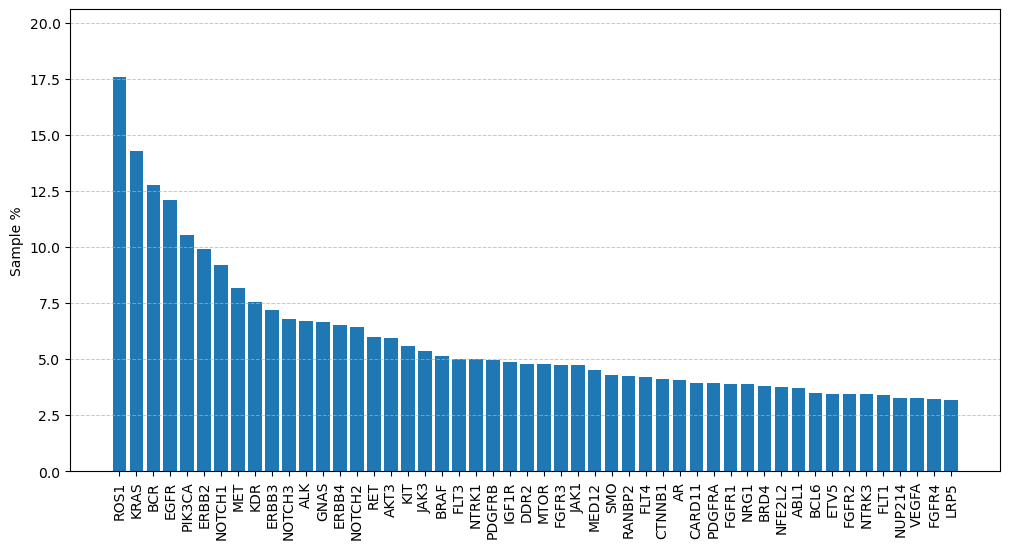

      Gene  Unique Sample Count  Percentage (%)
0     ROS1                  416       17.589852
1     KRAS                  338       14.291755
2      BCR                  302       12.769556
3     EGFR                  286       12.093023
4   PIK3CA                  249       10.528541
5    ERBB2                  234        9.894292
6   NOTCH1                  217        9.175476
7      MET                  193        8.160677
8      KDR                  178        7.526427
9    ERBB3                  170        7.188161
10  NOTCH3                  161        6.807611
11     ALK                  158        6.680761
12    GNAS                  157        6.638478
13   ERBB4                  154        6.511628
14  NOTCH2                  152        6.427061
15     RET                  142        6.004228
16    AKT3                  141        5.961945
17     KIT                  132        5.581395
18    JAK3                  127        5.369979
19    BRAF                  121        5

In [61]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = oncogene_df1.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the oncogene_df cohort
# total_unique_samples = oncogene_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(50)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 Oncogenes by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values) + 3)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_oncogene_df1 = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_oncogene_df1)

---

## TSG

In [29]:
#--- Pathogenic TSG Viz ---#
# Subset for tsg
tsg_df = patho_only_df[patho_only_df["OncoG_TSG"].isin(['TSG', 'Both'])]
tsg_df.head()

,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
20,063T-OTP-CE-S32-Merged,chr5 | 112174631 | 112174631 | C | T,chr5,112174631,112174631,C,T,APC,exonic,Stopgain,...,.,rs121913331,Lung_adenocarcinoma|Neoplasm_of_the_large_inte...,"Human_Phenotype_Ontology:HP:0030078,MeSH:C5382...",clinvar: Pathogenic,0,TSG,0,Unknown primary,UPC
21,063T-OTP-CE-S32-Merged,chr5 | 112175676 | 112175677 | AAG | A,chr5,112175676,112175677,AAG,A,APC,exonic,Frameshift Deletion,...,.,rs387906234,"Gardner_syndrome|Colorectal_cancer,_susceptibi...","MedGen:C0017097,Orphanet:ORPHA79665,SNOMED_CT:...",clinvar: Pathogenic,0,TSG,0,Unknown primary,UPC
35,063T-OTP-CE-S32-Merged,chr10 | 89717770 | 89717770 | TA | T,chr10,89717770,89717770,TA,T,PTEN,exonic,Frameshift Deletion,...,.,rs121913289,Neoplasm_of_the_breast|Neoplasm_of_the_large_i...,"Human_Phenotype_Ontology:HP:0100013,MeSH:D0019...",clinvar: Pathogenic,0,TSG,0,Unknown primary,UPC
100,IN-423-VFUD-F-ce-S22-L003,chr9 | 21971186 | 21971186 | G | A,chr9,21971186,21971186,G,A,CDKN2A,exonic,Stopgain,...,.,rs121913387,Neoplasm|Hereditary_cutaneous_melanoma,"Human_Phenotype_Ontology:HP:0002664,MeSH:D0093...",clinvar: Pathogenic,0,TSG,0,Oral,OC
102,IN-423-VFUD-F-ce-S22-L003,chr17 | 7577538 | 7577538 | C | T,chr17,7577538,7577538,C,T,TP53,exonic,Nonsynonymous SNV,...,"p53, DNA-binding domain|p53-like transcription...",rs11540652,Li-Fraumeni_syndrome_1|Hepatocellular_carcinom...,"Gene:553989,MedGen:C1835398,OMIM:151623|Human_...",clinvar: Pathogenic/Likely_pathogenic,0,TSG,0,Oral,OC


In [30]:
print(tsg_df.shape)
tsg_df['Sample_Name'].nunique()

(1416, 21)


951

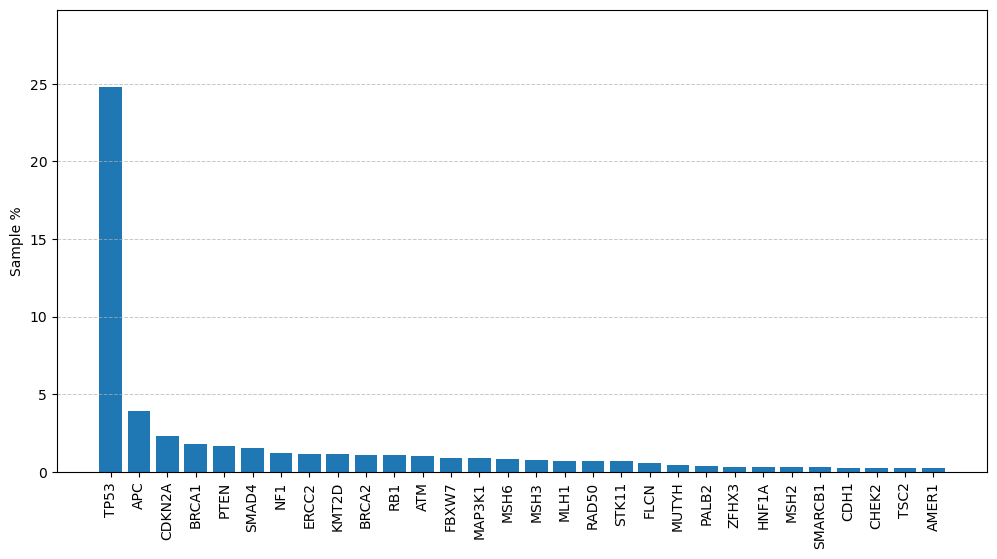

       Gene  Unique Sample Count  Percentage (%)
0      TP53                  586       24.778013
1       APC                   93        3.932347
2    CDKN2A                   54        2.283298
3     BRCA1                   42        1.775899
4      PTEN                   40        1.691332
5     SMAD4                   36        1.522199
6       NF1                   29        1.226216
7     ERCC2                   27        1.141649
8     KMT2D                   27        1.141649
9     BRCA2                   26        1.099366
10      RB1                   25        1.057082
11      ATM                   24        1.014799
12    FBXW7                   21        0.887949
13   MAP3K1                   21        0.887949
14     MSH6                   20        0.845666
15     MSH3                   18        0.761099
16     MLH1                   16        0.676533
17    RAD50                   16        0.676533
18    STK11                   16        0.676533
19     FLCN         

In [62]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = tsg_df.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the tsg_df cohort
# total_unique_samples = tsg_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(30)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 TSG by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values) + 5)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_tsg_df = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_tsg_df)

# ---

In [32]:
#--- Pathogenic TSG Viz ---#
# Subset for tsg
tsg_df1 = df[df["OncoG_TSG"].isin(['TSG', 'Both'])]
tsg_df1.head()

,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
1,063T-OTP-CE-S32-Merged,chr1 | 16199526 | 16199526 | G | A,chr1,16199526,16199526,G,A,SPEN,exonic,Nonsynonymous SNV,...,.,rs146693537,.,.,clinvar: UNK,0,TSG,0,Unknown primary,UPC
2,063T-OTP-CE-S32-Merged,chr1 | 27092786 | 27092786 | G | A,chr1,27092786,27092786,G,A,ARID1A,exonic,Nonsynonymous SNV,...,.,.,.,.,clinvar: UNK,0,TSG,0,Unknown primary,UPC
4,063T-OTP-CE-S32-Merged,chr1 | 120510113 | 120510113 | G | T,chr1,120510113,120510113,G,T,NOTCH2,exonic,Nonsynonymous SNV,...,EGF-like calcium-binding domain|EGF-like calci...,rs141935585,not_specified,MedGen:CN169374,clinvar: not_provided,0,Both,0,Unknown primary,UPC
6,063T-OTP-CE-S32-Merged,chr1 | 226558164 | 226558164 | C | T,chr1,226558164,226558164,C,T,PARP1,exonic,Nonsynonymous SNV,...,"Poly(ADP-ribose) polymerase, regulatory domain",rs758506201,.,.,clinvar: UNK,0,TSG,0,Unknown primary,UPC
8,063T-OTP-CE-S32-Merged,chr2 | 47693935 | 47693936 | A | AAT,chr2,47693935,47693936,A,AAT,MSH2,exonic,Frameshift Insertion,...,.,.,.,.,clinvar: UNK,0,TSG,0,Unknown primary,UPC


In [33]:
print(tsg_df1.shape)
tsg_df1['Sample_Name'].nunique()

(19320, 21)


2281

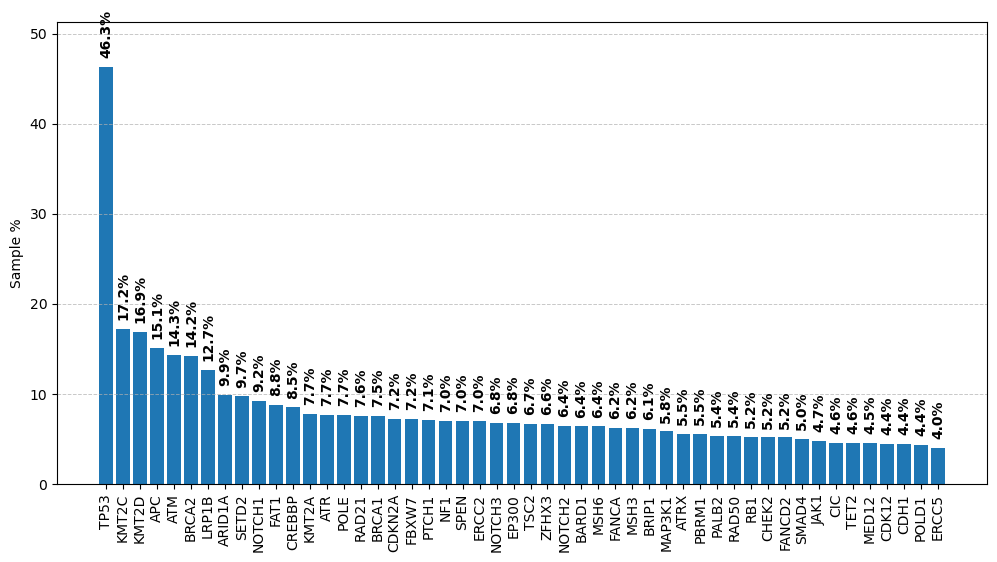

      Gene  Unique Sample Count  Percentage (%)
0     TP53                 1095       46.300211
1    KMT2C                  407       17.209302
2    KMT2D                  399       16.871036
3      APC                  358       15.137421
4      ATM                  339       14.334038
5    BRCA2                  337       14.249471
6    LRP1B                  300       12.684989
7   ARID1A                  233        9.852008
8    SETD2                  230        9.725159
9   NOTCH1                  217        9.175476
10    FAT1                  207        8.752643
11  CREBBP                  201        8.498943
12   KMT2A                  183        7.737844
13     ATR                  181        7.653277
14    POLE                  181        7.653277
15   RAD21                  179        7.568710
16   BRCA1                  178        7.526427
17  CDKN2A                  170        7.188161
18   FBXW7                  170        7.188161
19   PTCH1                  169        7

In [34]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = tsg_df1.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the tsg_df cohort
# total_unique_samples = tsg_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(50)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
for bar, gene in zip(bars, top_genes_unique.index):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Shift slightly above
             f'{bar.get_height():.1f}%', ha='center', va='bottom', 
             fontsize=10, rotation=90, fontweight='bold')

# Annotate each bar with sample counts (inside the bar, rotated 90 degrees)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, 2,  # Positioned inside the bar
#              f'({top_counts_unique[gene]})', ha='center', va='bottom', 
#              fontsize=10, rotation=90, color='white', fontweight='bold')

# # Add sample counts separately below each bar
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, -3, 
#              f'({top_counts_unique[gene]})', ha='center', fontsize=10)

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 TSG by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values) + 5)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_tsg_df1 = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_tsg_df1)

---

# Kinase

In [35]:
#--- Pathogenic Kinase Viz ---#
# Subset for kinase
kinase_df = patho_only_df[patho_only_df["Kinase"].isin([1])]
kinase_df.head()

,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
61,063T-OTP-CE-S32-Merged,chrX | 100624988 | 100624988 | GT | G,chrX,100624988,100624988,GT,G,BTK,exonic,Frameshift Deletion,...,.,rs864321664,X-linked_agammaglobulinemia,"MedGen:C0221026,OMIM:300755,Orphanet:ORPHA47,S...",clinvar: Pathogenic,0,Oncogene,1,Unknown primary,UPC
63,063T-OTP-CE-S32-Merged,chr2 | 203421005 | 203421005 | C | T,chr2,203421005,203421005,C,T,BMPR2,exonic,Stopgain,...,.,rs137852748,Primary_pulmonary_hypertension,"MedGen:C4552070,OMIM:178600,SNOMED_CT:26174007",clinvar: Pathogenic,0,,1,Unknown primary,UPC
175,IN-423-VFXS-F-ce-S25-L003,chr19 | 1207162 | 1207162 | A | T,chr19,1207162,1207162,A,T,STK11,exonic,Stopgain,...,Protein kinase domain|Protein kinase-like domain,rs137853076,Peutz-Jeghers_syndrome|Hereditary_cancer-predi...,"MeSH:D010580,MedGen:C0031269,OMIM:175200,Orpha...",clinvar: Pathogenic,0,TSG,1,Lung,LC
1738,VCCC-F-CE-S29,chr11 | 108115600 | 108115600 | C | T,chr11,108115600,108115600,C,T,ATM,exonic,Stopgain,...,Armadillo-like helical,rs772821016,Ataxia-telangiectasia_syndrome|Hereditary_canc...,"MedGen:C0004135,OMIM:208900,Orphanet:ORPHA100,...",clinvar: Pathogenic,0,TSG,1,Head and Neck,HNC
1946,VCGH-F-CE-S14,chr19 | 1219392 | 1219392 | TC | T,chr19,1219392,1219392,TC,T,STK11,exonic,Frameshift Deletion,...,.,.,Hereditary_cancer-predisposing_syndrome,"MedGen:C0027672,SNOMED_CT:699346009",clinvar: Pathogenic,0,TSG,1,Gallbladder,GBC


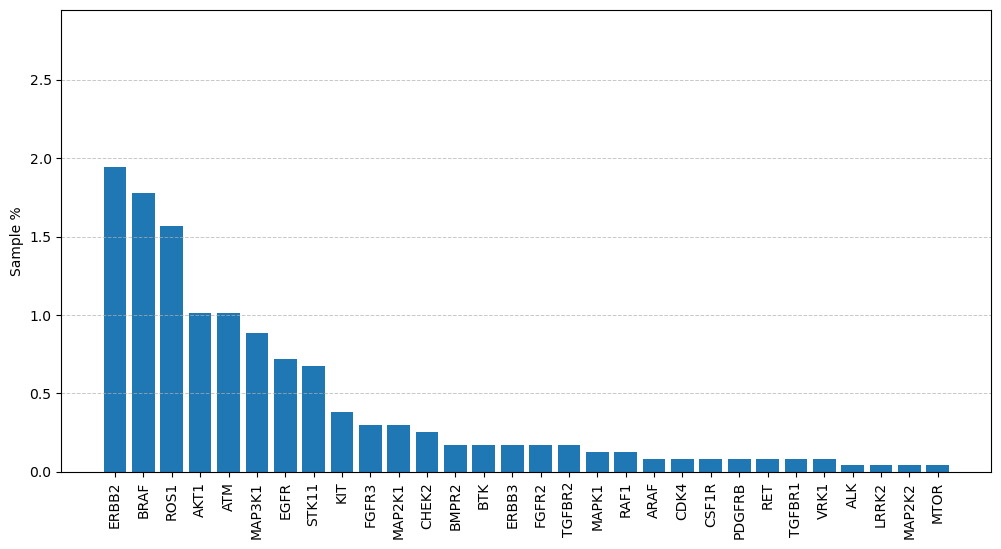

      Gene  Unique Sample Count  Percentage (%)
0    ERBB2                   46        1.945032
1     BRAF                   42        1.775899
2     ROS1                   37        1.564482
3     AKT1                   24        1.014799
4      ATM                   24        1.014799
5   MAP3K1                   21        0.887949
6     EGFR                   17        0.718816
7    STK11                   16        0.676533
8      KIT                    9        0.380550
9    FGFR3                    7        0.295983
10  MAP2K1                    7        0.295983
11   CHEK2                    6        0.253700
12   BMPR2                    4        0.169133
13     BTK                    4        0.169133
14   ERBB3                    4        0.169133
15   FGFR2                    4        0.169133
16  TGFBR2                    4        0.169133
17   MAPK1                    3        0.126850
18    RAF1                    3        0.126850
19    ARAF                    2        0

In [63]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = kinase_df.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the kinase_df cohort
# total_unique_samples = kinase_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(30)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 kinase by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values)+ 1)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_kinase_df = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_kinase_df)

# ---

In [37]:
#--- Pathogenic Kinase Viz ---#
# Subset for kinase
kinase_df1 = df[df["Kinase"].isin([1])]
kinase_df1.head()


,Sample_Name,Chr_SERA,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,...,Interpro_domain,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short
0,063T-OTP-CE-S32-Merged,chr1 | 11227554 | 11227554 | T | C,chr1,11227554,11227554,T,C,MTOR,exonic,Nonsynonymous SNV,...,Armadillo-like helical|Armadillo-type fold|PIK...,.,.,.,clinvar: UNK,0,Oncogene,1,Unknown primary,UPC
5,063T-OTP-CE-S32-Merged,chr1 | 156846258 | 156846258 | C | G,chr1,156846258,156846258,C,G,NTRK1,exonic,Nonsynonymous SNV,...,"Protein kinase domain|Protein kinase, ATP bind...",.,.,.,clinvar: UNK,0,Oncogene,1,Unknown primary,UPC
12,063T-OTP-CE-S32-Merged,chr3 | 30732993 | 30732993 | G | T,chr3,30732993,30732993,G,T,TGFBR2,exonic,Stopgain,...,Protein kinase domain|Protein kinase-like doma...,.,.,.,clinvar: UNK,0,TSG,1,Unknown primary,UPC
13,063T-OTP-CE-S32-Merged,chr3 | 89390222 | 89390222 | G | A,chr3,89390222,89390222,G,A,EPHA3,splicing,.,...,.,rs754818412,.,.,clinvar: UNK,0,TSG,1,Unknown primary,UPC
14,063T-OTP-CE-S32-Merged,chr3 | 89499363 | 89499363 | AC | A,chr3,89499363,89499363,AC,A,EPHA3,exonic,Frameshift Deletion,...,.,.,.,.,clinvar: UNK,0,TSG,1,Unknown primary,UPC


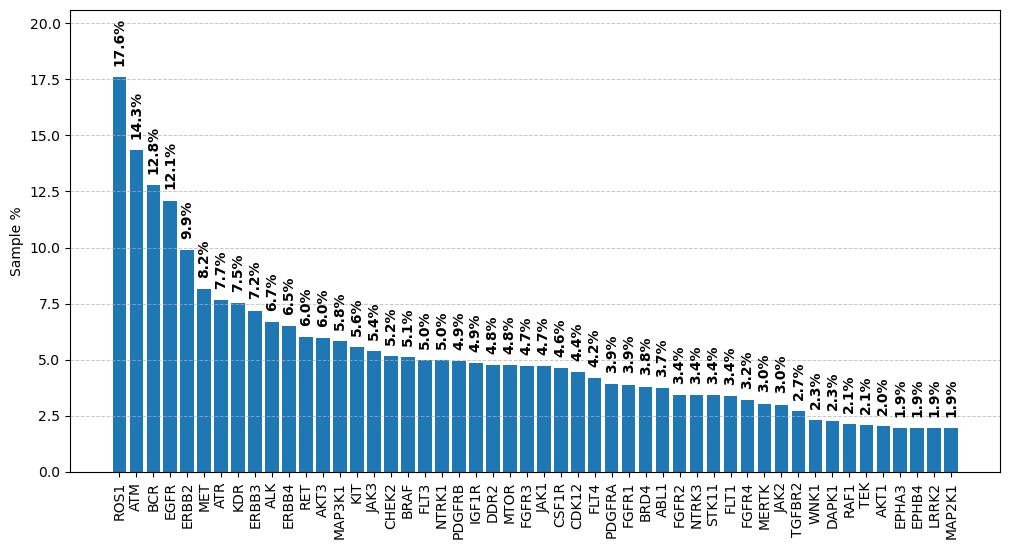

      Gene  Unique Sample Count  Percentage (%)
0     ROS1                  416       17.589852
1      ATM                  339       14.334038
2      BCR                  302       12.769556
3     EGFR                  286       12.093023
4    ERBB2                  234        9.894292
5      MET                  193        8.160677
6      ATR                  181        7.653277
7      KDR                  178        7.526427
8    ERBB3                  170        7.188161
9      ALK                  158        6.680761
10   ERBB4                  154        6.511628
11     RET                  142        6.004228
12    AKT3                  141        5.961945
13  MAP3K1                  138        5.835095
14     KIT                  132        5.581395
15    JAK3                  127        5.369979
16   CHEK2                  122        5.158562
17    BRAF                  121        5.116279
18    FLT3                  118        4.989429
19   NTRK1                  118        4

In [38]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = kinase_df1.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the kinase_df cohort
# total_unique_samples = kinase_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(50)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
for bar, gene in zip(bars, top_genes_unique.index):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Shift slightly above
             f'{bar.get_height():.1f}%', ha='center', va='bottom', 
             fontsize=10, rotation=90, fontweight='bold')

# Annotate each bar with sample counts (inside the bar, rotated 90 degrees)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, 2,  # Positioned inside the bar
#              f'({top_counts_unique[gene]})', ha='center', va='bottom', 
#              fontsize=10, rotation=90, color='white', fontweight='bold')

# # Add sample counts separately below each bar
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, -3, 
#              f'({top_counts_unique[gene]})', ha='center', fontsize=10)

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 kinase by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values)+ 3)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_kinase_df1 = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_kinase_df1)

---

## Amino Acid mapping

In [39]:
# Select columns: 'Ref.Gene', 'AAChange.ensGene', 'avsnp150'
patho_aa_df = patho_only_df.loc[:, ['Ref.Gene', 'avsnp150', 'AAChange.ensGene']]
# Drop duplicate rows across all columns
patho_aa_df = patho_aa_df.drop_duplicates()
# Filter rows based on column: 'AAChange.ensGene' not begining with .
patho_aa_df = patho_aa_df[~patho_aa_df['AAChange.ensGene'].str.startswith(".", na=False)]
len(patho_aa_df)

1021

In [40]:
# Extract reference and alternate amino acids
patho_aa_df["Ref_AA"] = patho_aa_df["AAChange.ensGene"].str.extract(r"p\.([A-Z])[0-9]+[A-Z]")[0]
patho_aa_df["Alt_AA"] = patho_aa_df["AAChange.ensGene"].str.extract(r"p\.[A-Z][0-9]+([A-Z])")[0]
patho_aa_df.head()

,Ref.Gene,avsnp150,AAChange.ensGene,Ref_AA,Alt_AA
20,APC,rs121913331,ENSG00000134982:ENST00000507379:exon14:c.3286C...,NaN,NaN
21,APC,rs387906234,ENSG00000134982:ENST00000257430:exon16:c.4385_...,NaN,NaN
35,PTEN,rs121913289,ENSG00000171862:ENST00000371953:exon7:c.95del7...,NaN,NaN
40,KRAS,rs121913529,ENSG00000133703:ENST00000256078:exon2:c.35G>A:...,NaN,NaN
61,BTK,rs864321664,ENSG00000010671:ENST00000308731:exon5:c.89del3...,NaN,NaN


In [41]:
# Amino acid single-letter to full name mapping
amino_acid_map = {
    "A": "Alanine", "R": "Arginine", "N": "Asparagine", "D": "Aspartic acid",
    "C": "Cysteine", "Q": "Glutamine", "E": "Glutamic acid", "G": "Glycine",
    "H": "Histidine", "I": "Isoleucine", "L": "Leucine", "K": "Lysine",
    "M": "Methionine", "F": "Phenylalanine", "P": "Proline", "S": "Serine",
    "T": "Threonine", "W": "Tryptophan", "Y": "Tyrosine", "V": "Valine"
}

# Map single-letter amino acids to full names
patho_aa_df["Ref_AA_Full"] = patho_aa_df["Ref_AA"].map(amino_acid_map)
patho_aa_df["Alt_AA_Full"] = patho_aa_df["Alt_AA"].map(amino_acid_map)
patho_aa_df.head()

,Ref.Gene,avsnp150,AAChange.ensGene,Ref_AA,Alt_AA,Ref_AA_Full,Alt_AA_Full
20,APC,rs121913331,ENSG00000134982:ENST00000507379:exon14:c.3286C...,NaN,NaN,NaN,NaN
21,APC,rs387906234,ENSG00000134982:ENST00000257430:exon16:c.4385_...,NaN,NaN,NaN,NaN
35,PTEN,rs121913289,ENSG00000171862:ENST00000371953:exon7:c.95del7...,NaN,NaN,NaN,NaN
40,KRAS,rs121913529,ENSG00000133703:ENST00000256078:exon2:c.35G>A:...,NaN,NaN,NaN,NaN
61,BTK,rs864321664,ENSG00000010671:ENST00000308731:exon5:c.89del3...,NaN,NaN,NaN,NaN


In [42]:
# Amino acid group classification bt side chain
amino_acid_groups = {
    "Aliphatic Amino Acids with Hydrophobic Side Chain": ["Alanine", "Valine", "Leucine", "Isoleucine", "Methionine"],
    "Aromatic Amino Acids with Hydrophobic Side Chain": ["Phenylalanine", "Tryptophan", "Tyrosine"],
    "Amino Acids with Neutral Side Chain": ["Serine", "Threonine", "Cysteine", "Asparagine", "Glutamine"],
    "Amino Acids with Negative Charged Side Chain (Acidic)": ["Aspartic acid", "Glutamic acid"],
    "Amino Acids with Positive Charged Side Chain (Basic)": ["Lysine", "Arginine", "Histidine"],
    "Imino Acid": ["Proline"],
    "Unique Amino Acid": ["Glycine"]
}

# Reverse mapping for group assignment
group_mapping = {}
for group, acids in amino_acid_groups.items():
    for acid in acids:
        group_mapping[acid] = group

# Assign groups based on full names
patho_aa_df["Ref_Group"] = patho_aa_df["Ref_AA_Full"].map(group_mapping)
patho_aa_df["Alt_Group"] = patho_aa_df["Alt_AA_Full"].map(group_mapping)

# Determine substitution type
def substitution_type(ref_group, alt_group):
    if ref_group == alt_group:
        return "Intra"
    return "Inter"

patho_aa_df["Substitution_Type"] = patho_aa_df.apply(
    lambda x: substitution_type(x["Ref_Group"], x["Alt_Group"]), axis=1
)

# Display the DataFrame
print(patho_aa_df)


      Ref.Gene      avsnp150  \
20         APC   rs121913331   
21         APC   rs387906234   
35        PTEN   rs121913289   
40        KRAS   rs121913529   
61         BTK   rs864321664   
...        ...           ...   
49828   MAP2K1  rs1057519729   
49892      RB1   rs121913302   
49894     PAX6   rs121907924   
49991     FGF3   rs281860303   
50003    BARD1   rs746325928   

                                        AAChange.ensGene Ref_AA Alt_AA  \
20     ENSG00000134982:ENST00000507379:exon14:c.3286C...    NaN    NaN   
21     ENSG00000134982:ENST00000257430:exon16:c.4385_...    NaN    NaN   
35     ENSG00000171862:ENST00000371953:exon7:c.95del7...    NaN    NaN   
40     ENSG00000133703:ENST00000256078:exon2:c.35G>A:...    NaN    NaN   
61     ENSG00000010671:ENST00000308731:exon5:c.89del3...    NaN    NaN   
...                                                  ...    ...    ...   
49828  ENSG00000169032:ENST00000307102:exon2:c.167A>C...    NaN    NaN   
49892  ENSG00000139687:

---

## All Genes Cancer Distribution

In [43]:
# Cancer Counts
patho_only_df.groupby('Cancer_Short')['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')

,Cancer_Short,Unique_Sample_Count
0,BC,133
1,BrC,18
2,CC,20
3,EC,33
4,GBC,48
5,HNC,13
6,KC,18
7,LBC,83
8,LC,315
9,LIC,146


In [44]:
patho_only_df.groupby('Cancer_Short')['Ref.Gene'].nunique().reset_index(name='Gene_Count')

,Cancer_Short,Gene_Count
0,BC,70
1,BrC,18
2,CC,14
3,EC,28
4,GBC,32
5,HNC,18
6,KC,20
7,LBC,57
8,LC,111
9,LIC,102


In [45]:
patho_only_df.groupby('Ref.Gene')['Sample_Name'].nunique().reset_index(name='Sample_Count').sort_values(by='Sample_Count', ascending=False)

,Ref.Gene,Sample_Count
273,TP53,586
139,KRAS,318
197,PIK3CA,183
10,APC,93
46,CDKN2A,54
...,...,...
105,GATA3,1
106,GATA4,1
194,PDGFRA,1
193,PCYT1A,1


In [46]:
# Count the number of samples each gene is present in
gene_sample_counts = patho_only_df.groupby("Ref.Gene")["Sample_Name"].nunique()

# Find the most common cancer type for each gene
gene_cancer_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique()
most_common_cancer_per_gene = gene_cancer_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

# Combine results into a dataframe
gene_summary = pd.DataFrame({
    "Sample_Count": gene_sample_counts,
    "Most_Common_Cancer": most_common_cancer_per_gene
})

print(gene_summary)


          Sample_Count Most_Common_Cancer
Ref.Gene                                 
AARS2                2                 LC
ABCC2                2                LBC
ACO2                 6                 LC
ADSL                 1                OvC
AKT1                24                 BC
...                ...                ...
XPC                  2                 LC
XPO1                 1                UtC
XRCC4                1                LBC
ZEB1                15                LBC
ZFHX3                8                 LC

[300 rows x 2 columns]


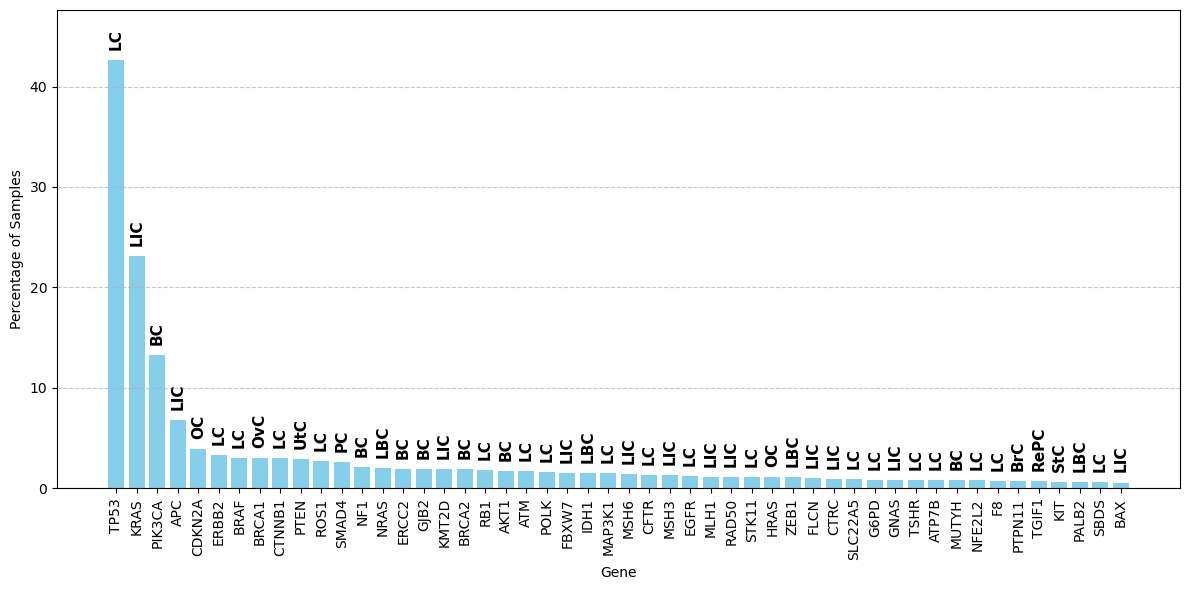

In [47]:
# Count the number of samples each gene is present in
gene_sample_counts = patho_only_df.groupby("Ref.Gene")["Sample_Name"].nunique()

# Find the most common cancer type for each gene
gene_cancer_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique()
most_common_cancer_per_gene = gene_cancer_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

# Combine results into a dataframe
gene_summary = pd.DataFrame({
    "Sample_Count": gene_sample_counts,
    "Most_Common_Cancer": most_common_cancer_per_gene
})

# Select top genes based on sample count
top_genes = gene_summary.nlargest(50, "Sample_Count")

# Calculate percentage sample count
top_genes["Sample_Percentage"] = (top_genes["Sample_Count"] / 1375) * 100

# Increase figure size for better readability
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes.index, top_genes["Sample_Percentage"], color="skyblue")

# Annotate bars with most common cancer type
for bar, cancer in zip(bars, top_genes["Most_Common_Cancer"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +1, cancer, ha="center", va="bottom", fontsize=11, rotation=90, fontweight='bold')

plt.ylim(0, max(top_genes['Sample_Percentage']) + 5)  # Adjust y-limits to accommodate labels

# Formatting
plt.xlabel("Gene")
plt.ylabel("Percentage of Samples")
#plt.title("Top 50 Genes by Sample Percentage with Most Common Cancer Type (Sample Count = 1375)")
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


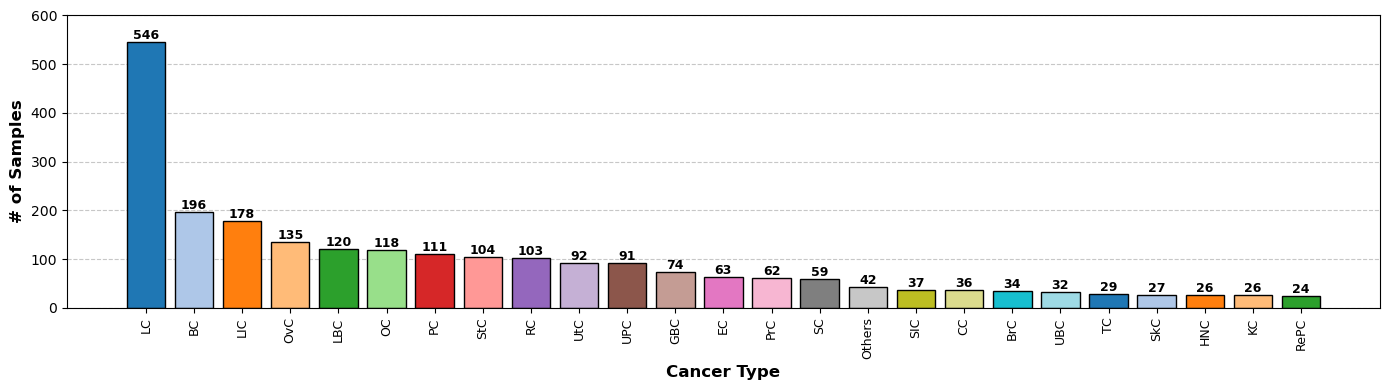

In [48]:
# Count the number of samples per cancer type for whole cancer cohort
cancer_sample_counts = df.groupby("Cancer_Short")["Sample_Name"].nunique().sort_values(ascending=False)

# Set up figure
fig, ax = plt.subplots(figsize=(14, 4))

# Generate colors for bars
colors = plt.cm.tab20.colors  # Using tab20 colormap for variety

# Create bar plot
bars = ax.bar(
    cancer_sample_counts.index, 
    cancer_sample_counts.values, 
    color=[colors[i % len(colors)] for i in range(len(cancer_sample_counts))], 
    edgecolor='black'
)

# Annotate bars with sample counts
for bar, count in zip(bars, cancer_sample_counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        str(count), 
        ha="center", 
        va="bottom", 
        fontsize=9, 
        fontweight="bold"
    )

# Formatting
ax.set_xlabel("Cancer Type", fontsize=12, fontweight="bold")
ax.set_ylabel("# of Samples", fontsize=12, fontweight="bold")
#ax.set_title("Sample Distribution per Cancer Type", fontsize=14, fontweight="bold")
ax.set_xticks(np.arange(len(cancer_sample_counts.index)))
ax.set_xticklabels(cancer_sample_counts.index, rotation=90, fontsize=9)
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

# Increase y-axis limit for better spacing
ax.set_ylim(0, max(cancer_sample_counts.values) * 1.1)  # Add 10% extra space

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()


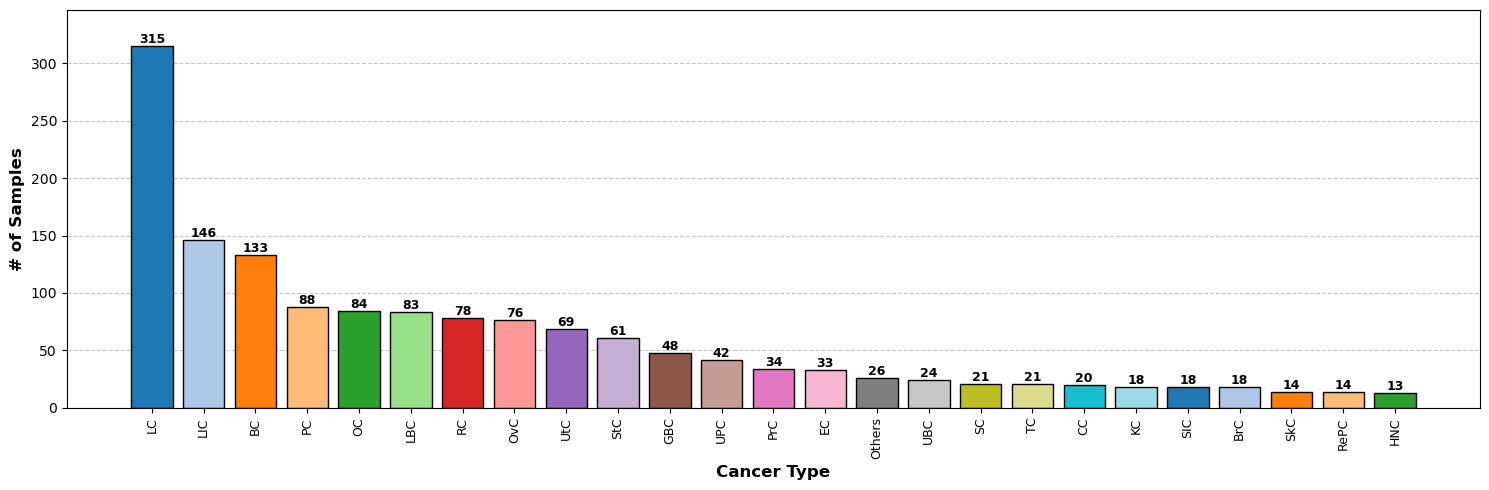

In [49]:
# Count the number of samples per cancer type for pathogenic subset
cancer_sample_counts = patho_only_df.groupby("Cancer_Short")["Sample_Name"].nunique().sort_values(ascending=False)

# Set up figure
fig, ax = plt.subplots(figsize=(15, 5))

# Generate colors for bars
colors = plt.cm.tab20.colors  # Using tab20 colormap for variety

# Create bar plot
bars = ax.bar(
    cancer_sample_counts.index, 
    cancer_sample_counts.values, 
    color=[colors[i % len(colors)] for i in range(len(cancer_sample_counts))], 
    edgecolor='black'
)

# Annotate bars with sample counts
for bar, count in zip(bars, cancer_sample_counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        str(count), 
        ha="center", 
        va="bottom", 
        fontsize=9, 
        fontweight="bold"
    )

# Formatting
ax.set_xlabel("Cancer Type", fontsize=12, fontweight="bold")
ax.set_ylabel("# of Samples", fontsize=12, fontweight="bold")
#ax.set_title("Sample Distribution per Cancer Type in Pathogenic only Subset", fontsize=14, fontweight="bold")
ax.set_xticks(np.arange(len(cancer_sample_counts.index)))
ax.set_xticklabels(cancer_sample_counts.index, rotation=90, fontsize=9)
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
# Increase y-axis limit for better spacing
ax.set_ylim(0, max(cancer_sample_counts.values) * 1.1)  # Add 10% extra space


# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()


---

In [50]:
# --- Calculate the percentage of samples with mutant genes per cancer type --- #

# Count the number of unique samples per cancer type
unique_samples_per_cancer = patho_only_df.groupby('Cancer_Short')['Sample_Name'].nunique()
# Count the number of mutations per cancer type
mutation_counts = patho_only_df['Cancer_Short'].value_counts()
# Count the number of unique genes per cancer type
mutant_gene_counts = patho_only_df.groupby('Cancer_Short')['Ref.Gene'].nunique()


# Calculate the percentage
gene_by_mutation = (mutant_gene_counts / mutation_counts) * 100
mutation_by_gene = (mutation_counts / mutant_gene_counts) * 100
# Calculate the percentage of unique samples with mutant genes per cancer type
gene_by_sample = (mutant_gene_counts / unique_samples_per_cancer) * 100

mutation_by_sample = (mutation_counts / unique_samples_per_cancer ) * 100

# Identify the most frequently mutated gene for each cancer type
most_mutated_gene = patho_only_df.groupby('Cancer_Short')['Ref.Gene'].agg(lambda x: x.value_counts().idxmax())

# Combine the results into a single DataFrame
mutation_summary = pd.DataFrame({
    'Total Unique Samples': unique_samples_per_cancer,
    'Total Mutations': mutation_counts,
    'Unique Mutant Genes': mutant_gene_counts,
    'Gene/Mutations': gene_by_mutation,
    'Mutations/Gene': mutation_by_gene,
    'Genes/Samples': gene_by_sample,
    'Muatations/Samples': mutation_by_sample,
    'Most Mutated Gene': most_mutated_gene
}).reset_index().rename(columns={'index': 'Cancer_Short'})

mutation_summary.head(n=50)


,Cancer_Short,Total Unique Samples,Total Mutations,Unique Mutant Genes,Gene/Mutations,Mutations/Gene,Genes/Samples,Muatations/Samples,Most Mutated Gene
0,BC,133,212,70,33.018868,302.857143,52.631579,159.398496,PIK3CA
1,BrC,18,27,18,66.666667,150.000000,100.000000,150.000000,IDH1
2,CC,20,29,14,48.275862,207.142857,70.000000,145.000000,TP53
3,EC,33,50,28,56.000000,178.571429,84.848485,151.515152,TP53
4,GBC,48,88,32,36.363636,275.000000,66.666667,183.333333,TP53
5,HNC,13,21,18,85.714286,116.666667,138.461538,161.538462,NRAS
6,KC,18,27,20,74.074074,135.000000,111.111111,150.000000,RB1
7,LBC,83,142,57,40.140845,249.122807,68.674699,171.084337,TP53
8,LC,315,456,111,24.342105,410.810811,35.238095,144.761905,TP53
9,LIC,146,456,102,22.368421,447.058824,69.863014,312.328767,KRAS


In [51]:
# --- Calculate the percentage of samples with mutant genes per cancer type --- #

# Count the number of unique samples per cancer type
unique_samples_per_cancer_df = df.groupby('Cancer_Short')['Sample_Name'].nunique()
# Count the number of unique samples per cancer type
unique_samples_per_cancer_patho_df = patho_only_df.groupby('Cancer_Short')['Sample_Name'].nunique()

# Identify the most frequently mutated gene for each cancer type
most_mutated_patho_gene = patho_only_df.groupby('Cancer_Short')['Ref.Gene'].agg(lambda x: x.value_counts().idxmax())

# Combine the results into a single DataFrame
mutation_summary = pd.DataFrame({
    'Total Unique Samples': unique_samples_per_cancer_df,
    'Total Unique Samples having Pathogenic Mutation': unique_samples_per_cancer_patho_df,
    'Most Mutated Gene': most_mutated_patho_gene
}).reset_index().rename(columns={'index': 'Cancer_Short'})

mutation_summary.head(n=50)

,Cancer_Short,Total Unique Samples,Total Unique Samples having Pathogenic Mutation,Most Mutated Gene
0,BC,196,133,PIK3CA
1,BrC,34,18,IDH1
2,CC,36,20,TP53
3,EC,63,33,TP53
4,GBC,74,48,TP53
5,HNC,26,13,NRAS
6,KC,26,18,RB1
7,LBC,120,83,TP53
8,LC,546,315,TP53
9,LIC,178,146,KRAS


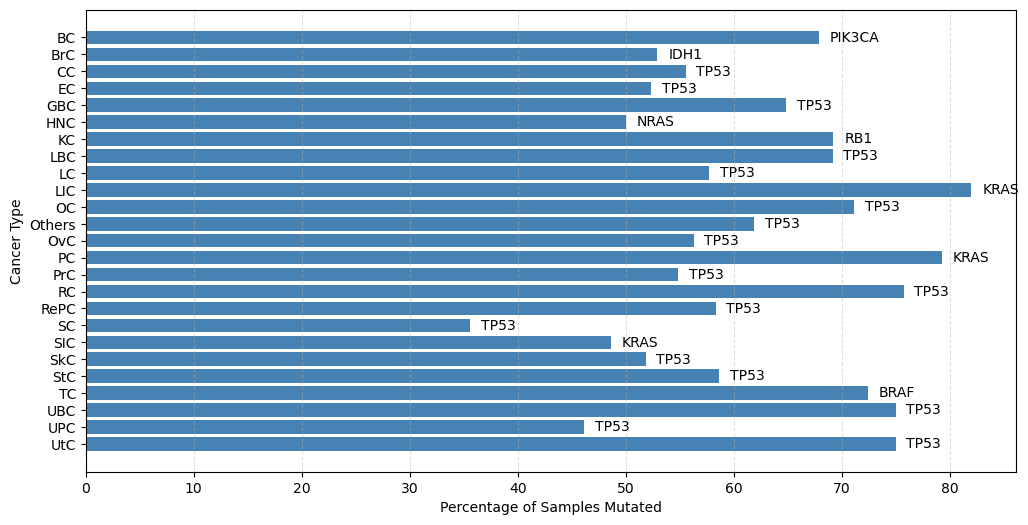

In [52]:
# Update the bar chart to annotate with most mutated gene
df_updated = mutation_summary

# Calculate the percentage of samples mutated
df_updated["Percentage Mutated"] = (df_updated["Total Unique Samples having Pathogenic Mutation"] / df_updated["Total Unique Samples"]) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(df_updated["Cancer_Short"], df_updated["Percentage Mutated"], color="steelblue")
plt.xlabel("Percentage of Samples Mutated")
plt.ylabel("Cancer Type")
#plt.title("Percentage of Unique Samples Having Pathogenic Mutation per Cancer Type with Most Mutated Gene labelled")

# Annotate bars with the most mutated gene
for bar, gene in zip(bars, df_updated["Most Mutated Gene"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, gene, va='center')

plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Display the plot
plt.show()


---

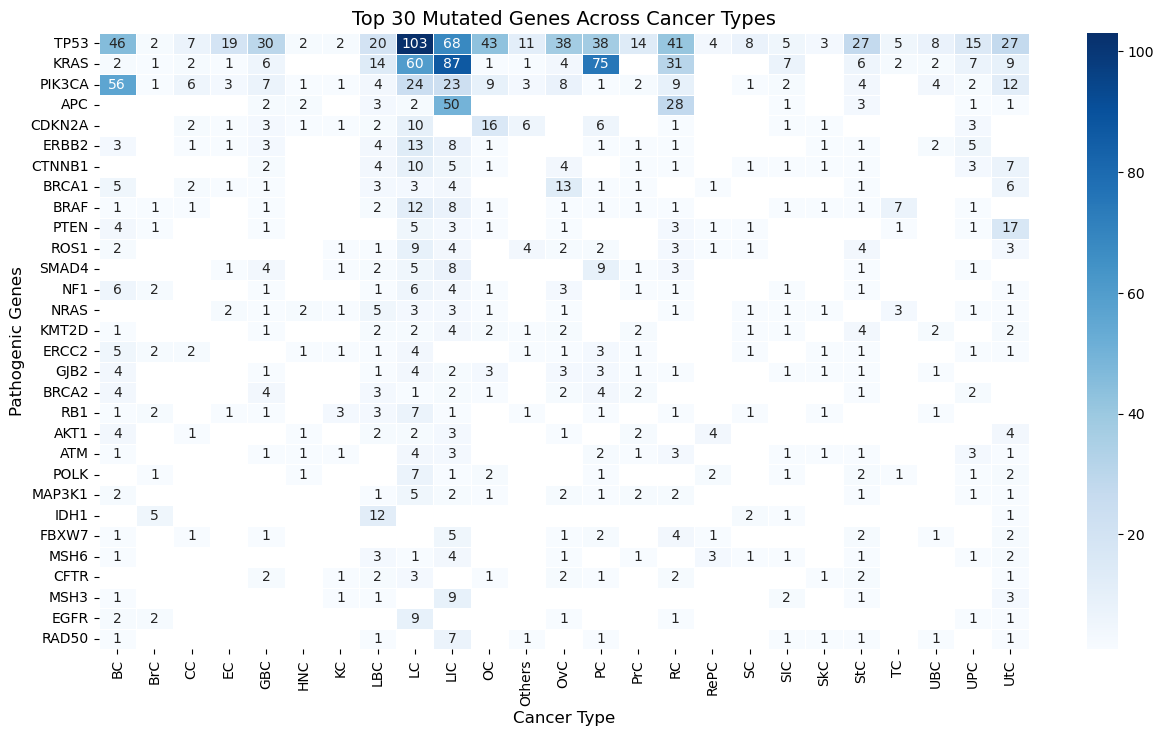

In [53]:
# --- Heatmap with Count ---#
# Count unique samples per gene and Cancer type
gene_mutation_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique().reset_index()
gene_mutation_counts.columns = ["Gene", "Cancer_Short", "Unique Mutation Count"]

# Pivot the data for heatmap plotting
heatmap_data = gene_mutation_counts.pivot(index="Gene", columns="Cancer_Short", values="Unique Mutation Count")

# Select the top 30 genes with the highest mutation counts
top_genes = heatmap_data.sum(axis=1).sort_values(ascending=False).head(30).index
heatmap_data_filtered = heatmap_data.loc[top_genes]

# Plot the improved heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_filtered, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")

# Set labels and title
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Pathogenic Genes", fontsize=12)
plt.title("Top 30 Mutated Genes Across Cancer Types", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the refined heatmap
plt.show()

# Display the heatmap
plt.show()

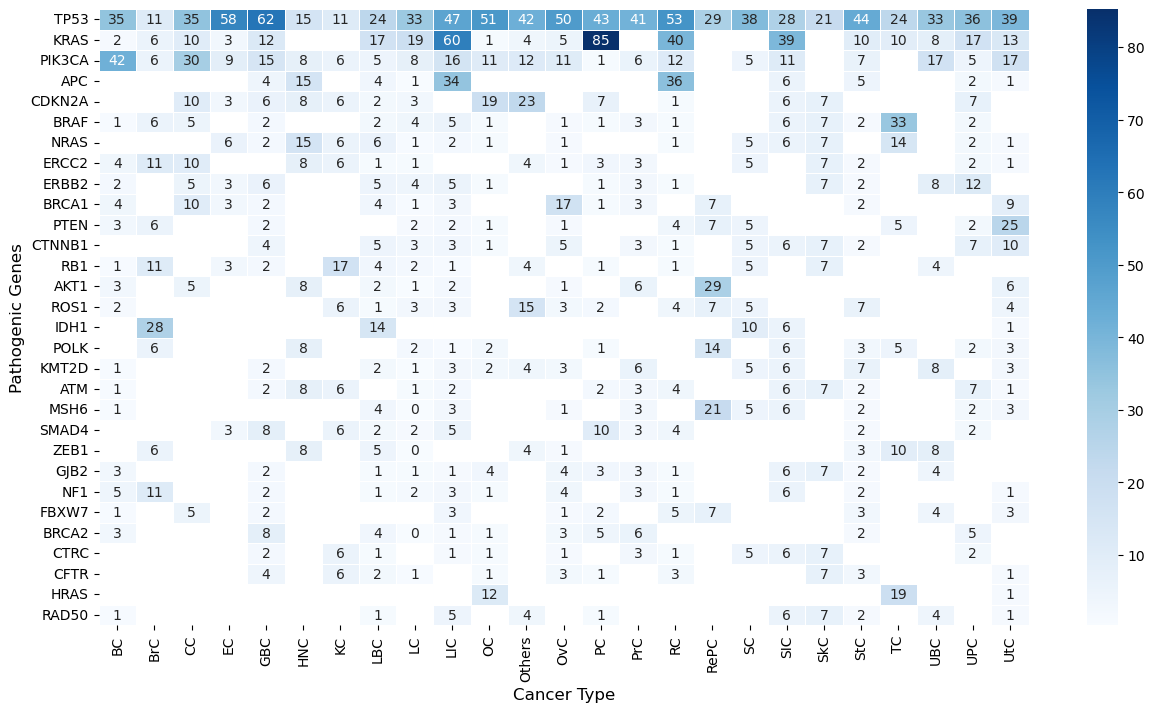

In [54]:
# --- Heatmap with Percentage --- #
# Count unique samples per gene and cancer type
gene_mutation_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique().reset_index()
gene_mutation_counts.columns = ["Gene", "Cancer_Short", "Unique Mutation Count"]

# Count total unique samples per cancer type
total_samples_per_cancer_df = patho_only_df.groupby("Cancer_Short")["Sample_Name"].nunique().reset_index()
total_samples_per_cancer_df.columns = ["Cancer_Short", "Total Unique Samples"]

# Merge the mutation counts with total sample counts
gene_mutation_percentage_df = gene_mutation_counts.merge(total_samples_per_cancer_df, on="Cancer_Short")

# Calculate the mutation percentage per gene and cancer type
gene_mutation_percentage_df["Mutation Percentage"] = (
    gene_mutation_percentage_df["Unique Mutation Count"] / gene_mutation_percentage_df["Total Unique Samples"]
) * 100

# Pivot the data for heatmap plotting
heatmap_data = gene_mutation_percentage_df.pivot(index="Gene", columns="Cancer_Short", values="Mutation Percentage")

# Select the top 30 genes with the highest mutation counts
top_genes = heatmap_data.sum(axis=1).sort_values(ascending=False).head(30).index
heatmap_data_filtered = heatmap_data.loc[top_genes]

# Plot the improved heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_filtered, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")

# Set labels and title
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Pathogenic Genes", fontsize=12)
#plt.title("Top 30 Pathogenic Genes Across Cancer Types with counts as percentage", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the refined heatmap
plt.show()

# Display the heatmap
plt.show()


---

C:\Users\Nilesh\AppData\Local\Temp\ipykernel_2660\2805536857.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = patho_only_df[df["ExonicFunc.ensGene"] != "."]
C:\Users\Nilesh\AppData\Local\Temp\ipykernel_2660\2805536857.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set2_colors = cm.get_cmap("Set2", len(filtered_exonic_func_counts.columns)).colors


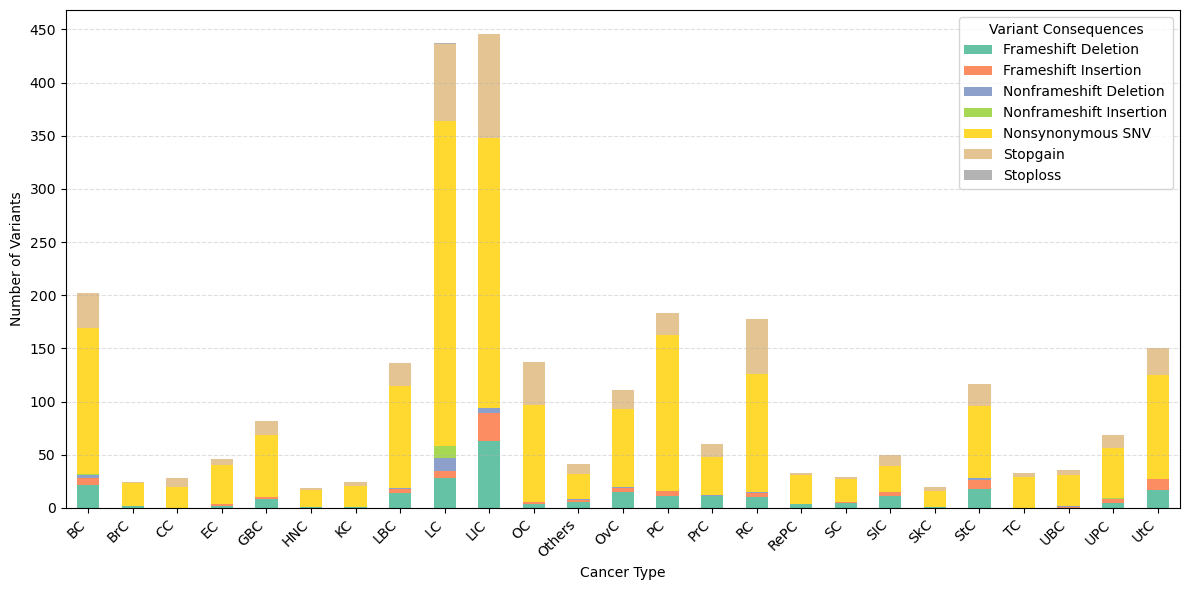

In [55]:
# --- For plotting the ExonicFunc.ensGene distribution per Cancer type --- #

# Filter out rows where ExonicFunc.ensGene is "."
filtered_df = patho_only_df[df["ExonicFunc.ensGene"] != "."]

# Count occurrences of each ExonicFunc.ensGene per Cancer type
filtered_exonic_func_counts = filtered_df.groupby(["Cancer_Short", "ExonicFunc.ensGene"]).size().unstack(fill_value=0)

# Increase figure size for better label alignment
fig, ax = plt.subplots(figsize=(12, 6))

# Define color mapping using Set2 qualitative colormap
set2_colors = cm.get_cmap("Set2", len(filtered_exonic_func_counts.columns)).colors
color_map = {func: set2_colors[i % len(set2_colors)] for i, func in enumerate(filtered_exonic_func_counts.columns)}

# Plot the stacked bar chart with Set2 colormap
filtered_exonic_func_counts.plot(kind="bar", stacked=True, color=[color_map[func] for func in filtered_exonic_func_counts.columns], ax=ax)

# Improve layout and readability
plt.xlabel("Cancer Type")
plt.ylabel("Number of Variants")
#plt.title("Distribution of ExonicFunc.ensGene per Cancer Type (Excluding '.')")
plt.xticks(rotation=45, ha='right')  # Align x-axis labels properly
plt.legend(title="Variant Consequences", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Set y-axis ticks at intervals
ax.set_yticks(np.arange(0, filtered_exonic_func_counts.sum(axis=1).max() + 50, 50))

# Show the plot
plt.show()

In [56]:
filtered_exonic_func_counts.head(n=20)


ExonicFunc.ensGene,Frameshift Deletion,Frameshift Insertion,Nonframeshift Deletion,Nonframeshift Insertion,Nonsynonymous SNV,Stopgain,Stoploss
Cancer_Short,,,,,,,
BC,22,6,3,1,137,33,0
BrC,2,0,0,0,21,1,0
CC,0,0,0,0,20,8,0
EC,2,2,0,0,36,6,0
GBC,8,2,0,0,59,13,0
HNC,1,0,0,0,16,2,0
KC,1,0,0,0,20,3,0
LBC,14,4,1,0,96,21,0
LC,28,7,12,11,306,72,1


In [57]:
# Calculate the total for each Cancer type
filtered_exonic_func_counts["Total"] = filtered_exonic_func_counts.sum(axis=1)

# Compute the percentage for each exonic term
percentage_filtered_exonic_func_counts = filtered_exonic_func_counts.div(filtered_exonic_func_counts["Total"], axis=0) * 100

# Drop the "Total" column after computing percentages
percentage_filtered_exonic_func_counts.drop(columns=["Total"], inplace=True)

C:\Users\Nilesh\AppData\Local\Temp\ipykernel_2660\3577885679.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set2_colors = cm.get_cmap("Set2", len(percentage_filtered_exonic_func_counts.columns)).colors


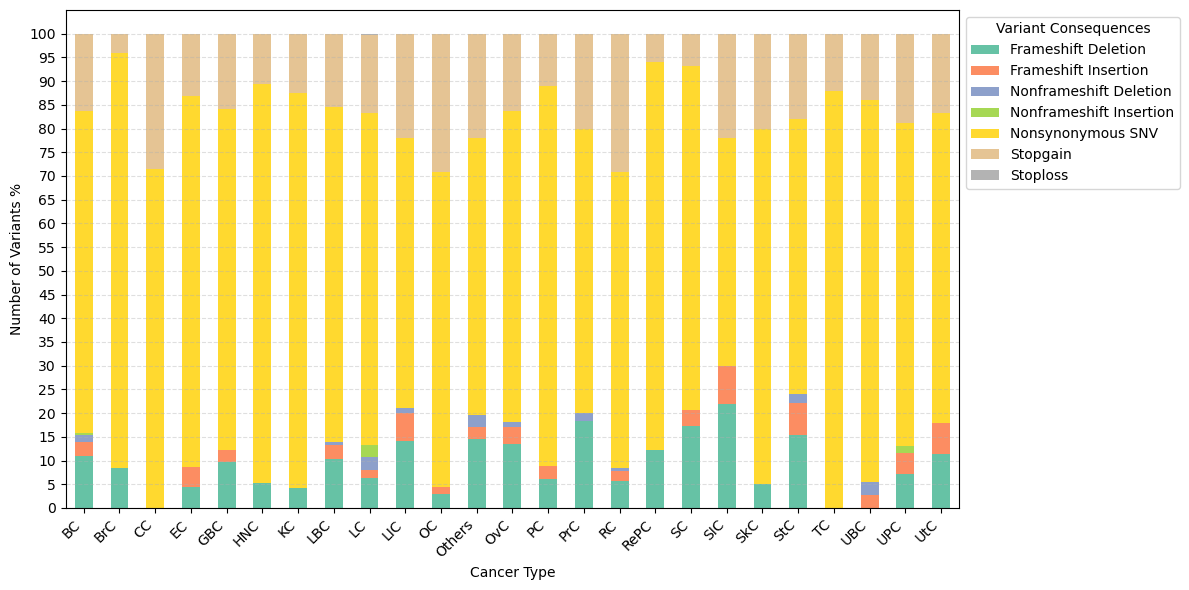

In [58]:
# Increase figure size for better label alignment
fig, ax = plt.subplots(figsize=(12, 6))

# Define color mapping using Set2 qualitative colormap
set2_colors = cm.get_cmap("Set2", len(percentage_filtered_exonic_func_counts.columns)).colors
color_map = {func: set2_colors[i % len(set2_colors)] for i, func in enumerate(percentage_filtered_exonic_func_counts.columns)}

# Plot the stacked bar chart with Set2 colormap
percentage_filtered_exonic_func_counts.plot(kind="bar", stacked=True, color=[color_map[func] for func in percentage_filtered_exonic_func_counts.columns], ax=ax)

# Improve layout and readability
plt.xlabel("Cancer Type")
plt.ylabel("Number of Variants %")
#plt.title("Unique ExonicFunc.ensGene Counts by Pathogenic Gene per Cancer Type")
plt.xticks(rotation=45, ha='right')  # Align x-axis labels properly
plt.legend(title="Variant Consequences", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Set y-axis ticks at intervals of 5
ax.set_yticks(np.arange(0, percentage_filtered_exonic_func_counts.sum(axis=1).max(), 5))

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show the plot
plt.show()

In [59]:
# Select columns: 'Sample_Name', 'Cancer'
patho_samp = patho_only_df.loc[:, ['Sample_Name', 'Cancer']]
patho_samp = patho_samp.drop_duplicates()
patho_samp = patho_samp.rename(columns={'Sample_Name': 'Sample'})
patho_samp = patho_samp.rename(columns={'Cancer': 'Cohort'})
print(patho_samp)
patho_samp.to_csv(r"H:\My Drive\Pathogenic_Landscape\data\indigene\patho_samp.tsv", sep="\t", index= False)

                          Sample           Cohort
20        063T-OTP-CE-S32-Merged  Unknown primary
82     IN-423-VFTM-F-ce-S35-L003             Lung
100    IN-423-VFUD-F-ce-S22-L003             Oral
129    IN-423-VFUF-F-ce-S24-L003             Lung
137    IN-423-VFUH-F-ce-S19-L003  Large Intestine
...                          ...              ...
49943            XHWAM-F-D-CE-S1           Breast
49961           XHWAN-F1-D-CE-S1           Others
49984       XHZAZ-F-D-L2L1-CE-S1  Large Intestine
50041         XHZBA-F1F2-D-CE-S1         Prostate
50065    XHZBC-F-D1D2-L1L2-CE-S1           Rectum

[1497 rows x 2 columns]


## Mutual Exclusivity and Co-Occurence plot made in R through Maftools